## Scikit-Learn 소개

 -  다양한 머신 러닝 알고리즘을 구현하여 간단한 API로 제공하는 Python 라이브러리     
 -  다양한 데이터집합 제공 :  
    sklearn.datasets의 load_* ()함수
 -  데이터에 대한 모델을 평가하기 위해 학습 세트 와 테스트 세트 로 분리 :   
    sklearn.model_selection의 train_test_split()함수
 -  다양한 머신러닝 알고리즘 제공 : 
   - linear_model인 linear regression알고리즘 모듈  
     from sklearn.linear_model import LinearRegressionsklearn.linear_model
   - naive_bayes의  GaussianNB 알고리즘 모듈  
     from sklearn.naive_bayes import GaussianNB  
   - neighbors의  KNeighborsClassifier 알고리즘 모듈  
     from sklearn.neighbors import KNeighborsClassifier
 - 모델링
  - 모델 객체를 생성하여 학습데이터로 모델링  
    model = LinearRegression(fit_intercept=True)  #모델객체 생성  
    model.fit(X, y)  # 학습 데이터 X,y를 이용하여 모델링  
 - 예측  
   새로운 데이터(nX)를 모델링 결과로 얻은 모델로 결과(ny) 예측  
   ny = model.predict(nX)  
 - 예측 성능확인
   sklearn.metrics의 accuracy_score()함수

https://scikit-learn.org/stable/  

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

### (1)Supervised learning example: Simple linear regression

model.coef_= [1.9715193]
model.intercept_ =  -0.8154632760835163


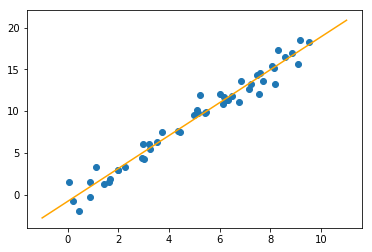

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#(1)Scikit-Learn의 선형모델  linear regression  모듈 가져오기
from sklearn.linear_model import LinearRegression

#(2) 모델 객체 생성
model = LinearRegression(fit_intercept=True)
model

#(3) 데이터 준비
# 지도학습을 위한 학습 데이터 준비
# 데이터는 입력(x,feature)과 출력(y,target)으로 구성
# 50개의 랜덤 값 생성
rng = np.random.RandomState(10)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#(4) 데이터 구조 변경
# 데이터 구조
#   입력(x)  : 2차원 특징(feature) 행렬
#   출력(y) :  1차원 목표(target) 벡터  
X = x[:, np.newaxis]
X.shape

#(5)데이터를 이용하여  linear regression 모델링 
#데이터로 얻은 선형 함수의 기울기(model.coef_)와 절편(model.intercept_)을 확인
model.fit(X, y)
print("model.coef_=", model.coef_)
print("model.intercept_ = ", model.intercept_)

#(6)새로운 입력(nx)에 대한 출력(ny) 예측

nx = np.linspace(-1, 11)
nX = nx[:, np.newaxis]
ny = model.predict(nX)

#(7)예측값에 대한 모델 (선형함수) 출력
plt.plot(nx, ny, color="orange" )

모델 (선형 함수)  
$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$

$w = (w_1,..., w_p)$ : model.coef_  
$w_0$ : model.intercept_.


### (2)Supervised learning example: Iris classification
 
algorithm : Gaussian naive Bayes  

In [14]:
# (1)scikit learn 제공  iris 데이터 셋 가져오기
from sklearn.datasets import load_iris
iris = load_iris()

#iris는 key-value로 구성된 dictionary 와 유사한 bounch class
# dataset key값 확인
print("iris_dataset의 key: {}".format(iris.keys()))

#데이터 설명을 포함한 'DESCR' key의  value 확인
print(iris['DESCR'][:193] + "\n...")

#데이터 셋 확인
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: {}".format(iris['feature_names']))
print("data의 타입: {}".format(type(iris['data'])))  #x, features
print("data의 크기: {}".format(iris['data'].shape))
print("data의 처음 다섯 행:\n{}".format(iris['data'][:5]))
print("target의 타입: {}".format(type(iris['target'])))
print("타깃:\n{}".format(iris['target']))   #y, target, class

# 모델링을 위한 x, y 값 설정
irisX = iris['data']
irisy = iris['target']
print(irisX.shape)


iris_dataset의 key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기: (150, 4)
data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입: <class 'numpy.ndarray'>
타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


In [26]:
# (2)데이터에 대한 모델을 평가하기위해 학습 세트 와 테스트 세트 로 분리
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(irisX, irisy,
                                                random_state=1)


#(3)Modeling
# 학습데이터로  GaussianNB 알고리즘으로 모델링
from sklearn.naive_bayes import GaussianNB  #GaussianNB 모듈 가져오기  
model = GaussianNB()                         # 모델 객체 생성
model.fit(Xtrain, ytrain)                    #학습데이터를 이용하여 모델링
y_model = model.predict(Xtest)               # 새로운 데이터 예측

#(4)예측결과에 대한 성능 확인 
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### (3)Unsupervised learning example: Iris dimensionality

algorithm : PCA

Text(0.5,1,'iris dimensionality')

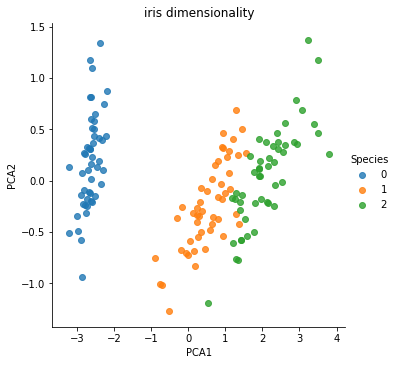

In [21]:
#(1) PCA 모델링
from sklearn.decomposition import PCA  # PCA 모듈 가져오기
model = PCA(n_components=2)            # PCA 모델객체 생성
model.fit(irisX)              # iris 입력데이터로 차원축소 모델링

#(2)변환
#iris 입력데이터를 차원축소 모델을 이용하여 2차원 데이터로 변환
X_2D = model.transform(irisX) 

#(3)iris 데이터프레임에 변환값 추가
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['Species'] = iris.target
irisdf['PCA1'] = X_2D[:, 0]
irisdf['PCA2'] = X_2D[:, 1]
#(3)변환값 확인
sns.lmplot("PCA1", "PCA2", hue='Species', data=irisdf, fit_reg=False);
plt.title('iris dimensionality')

### (4)Unsupervised learning:  clustering
algorithm : k-Means

$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

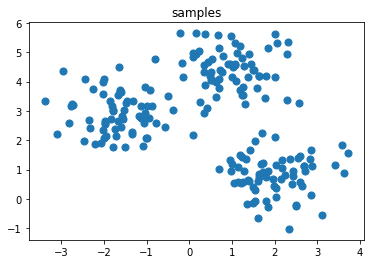

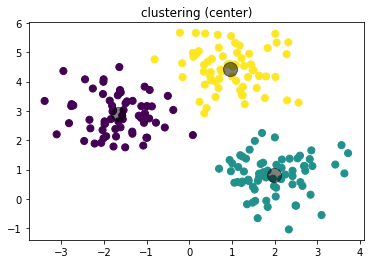

In [29]:
# (1)랜덤 데이터 생성 및 확인
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=200, centers=3,
                       cluster_std=0.70, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);
plt.title('samples')
plt.show()

# (2)KMeans 모듈로 모델링
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

#(3)결과 확인
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.title('clustering (center)')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()